In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import warnings

warnings.filterwarnings("ignore")

In [2]:
train_dir='c:/data/intel-image-classification/seg_train/seg_train'
test_dir='c:/data/intel-image-classification/seg_test/seg_test'

train_data_gen=ImageDataGenerator(rescale = 1/255.)
test_data_gen=ImageDataGenerator(rescale=1/255.)

train_data = train_data_gen.flow_from_directory(train_dir,
                                          target_size = (224, 224), # 이미지 사ㅓ이즈
                                          batch_size = 32, # 미니배치 사이즈
                                          class_mode = 'categorical')

val_data = test_data_gen.flow_from_directory(test_dir,
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [3]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [4]:
images1, labels1 = val_data.next()
len(images1), len(labels1), images1[0].shape

(32, 32, (224, 224, 3))

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential, Input

model = Sequential([
            Input(shape = images[0].shape), # 입력층
            Conv2D(32, (3, 3), padding='same', activation='relu'), # 합성곱층
            MaxPooling2D((2, 2), strides=2),
            Conv2D(64, (3, 3), padding='same', activation='relu'),
            MaxPooling2D((2, 2), strides=2),
            Flatten(), # 다차원을 1차원으로 변경
            Dense(128, activation = 'relu'),
            Dense(6, activation = 'softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [6]:
from keras.callbacks import ReduceLROnPlateau

# lr : 학습률
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

classifier=model.fit(train_data,
                         validation_data=val_data,
                         batch_size=64,
                         verbose=1,
                         epochs=2,
                         callbacks=[reduce_lr])

Epoch 1/2
439/439 [==============================] - 355s 806ms/step - loss: 1.0963 - accuracy: 0.6290 - val_loss: 0.7299 - val_accuracy: 0.7387 - lr: 0.0010
Epoch 2/2
439/439 [==============================] - 345s 785ms/step - loss: 0.5405 - accuracy: 0.8122 - val_loss: 0.6709 - val_accuracy: 0.7650 - lr: 0.0010


In [7]:
model.evaluate(val_data)

94/94 [==============================] - 13s 134ms/step - loss: 0.6709 - accuracy: 0.7650


[0.6708930134773254, 0.7649999856948853]

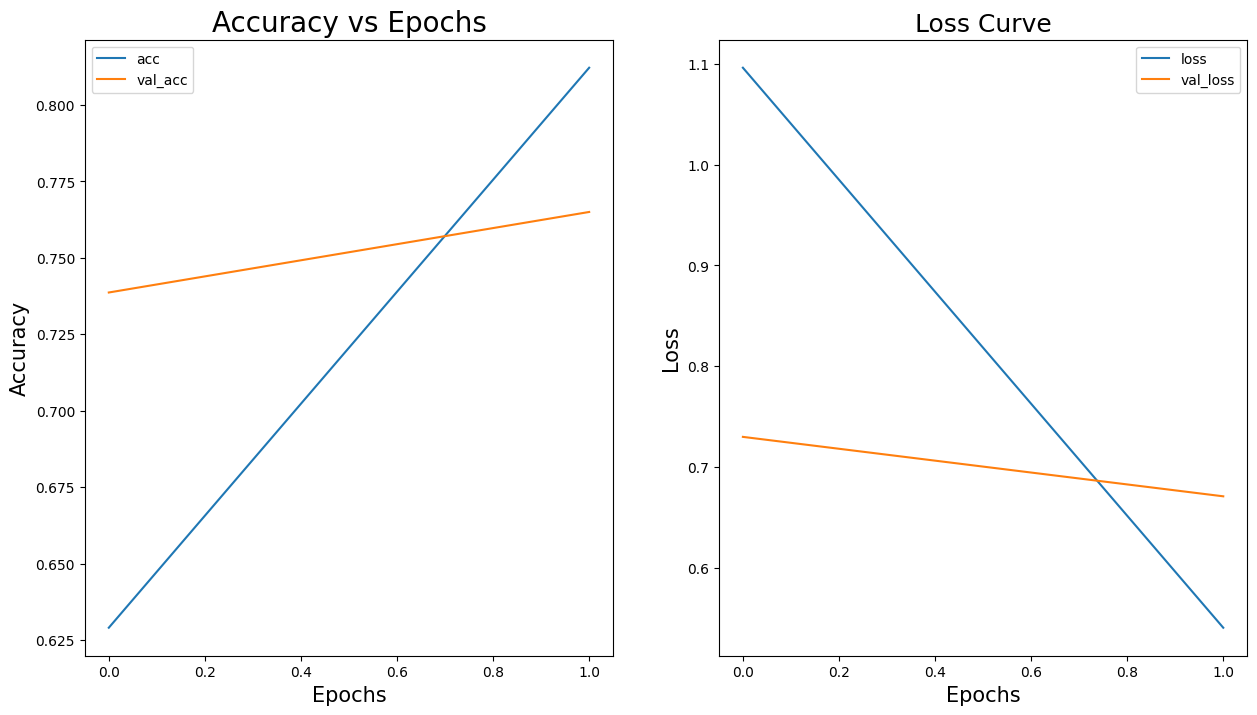

In [8]:
def model_performance_graphs():

    

    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label = 'acc')

    axes[0].plot(classifier.epoch, classifier.history['val_accuracy'], label = 'val_acc')

    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)

    axes[0].set_xlabel('Epochs', fontsize = 15)

    axes[0].set_ylabel('Accuracy', fontsize = 15)

    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')

    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")

    axes[1].set_title("Loss Curve",fontsize=18)

    axes[1].set_xlabel("Epochs",fontsize=15)

    axes[1].set_ylabel("Loss",fontsize=15)

    axes[1].legend()

    plt.show()

    

model_performance_graphs()

In [9]:
model.save('scene_model.h5')

In [10]:
from tensorflow.keras.models import load_model

loaded_model = load_model('scene_model.h5')

In [11]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_array / 255.0  
    return img_preprocessed

In [12]:
img_path = "c:/data/intel-image-classification/seg_test/seg_test/mountain/20327.jpg"
# 이미지 전처리
img = preprocess_images(img_path)

prediction = loaded_model.predict(img)
predicted_class_index = np.argmax(prediction)
class_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)



1/1 [==============================] - 0s 84ms/step
Predicted class: mountain
